In [1]:
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import scipy.stats as sp
from PIL import ImageFont, Image, ImageDraw

<img src = normal_dist.jpg width=700>
## ![](normal_dist.jpg)으로 해도 됌

In [2]:
sp.norm(0,1).pdf(0.5)

0.3520653267642995

---

(105, 161, 3)
9 255 19
9.0 255.0 19.0
0.3520653267642995


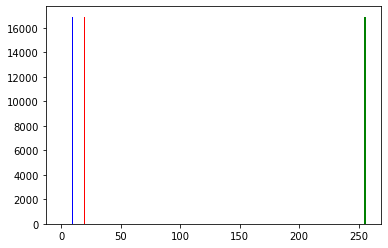

In [3]:
train = cv2.imread("../2020.01.06/patch3.png")
print(train.shape)
b,g,r = cv2.split(train)

hb = plt.hist(b.ravel(), 256, [0,256], color='b')
hg = plt.hist(g.ravel(), 256, [0,256], color='g')
hr = plt.hist(r.ravel(), 256, [0,256], color='r')

maxb = (np.where( hb[0] == np.max(hb[0])))[0][0]
maxg = (np.where( hg[0] == np.max(hg[0])))[0][0]
maxr = (np.where( hr[0] == np.max(hr[0])))[0][0]

print(maxb, maxg, maxr)
print(np.mean(b), np.mean(g), np.mean(r)) # maximum값들과 같은 이유는 단색이기 때문에

t = 7
p = sp.norm(0,1).pdf((9-7)/4)
print(p)

---

(480, 852, 3)


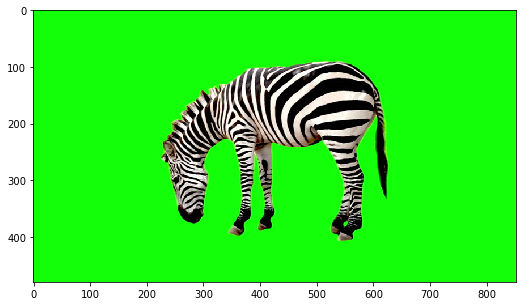

In [14]:
test = cv2.imread("../2020.01.06/zoo.jpg")
print(test.shape)

for r in range(test.shape[0]):
    for c in range(test.shape[1]):
        if np.array_equal (test[r,c,:], [maxg, maxb, maxr]):
            test[r, c, :] = [0,0,0]
fig=plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))

-----

### 간단한 연습

In [67]:
a = np.array([250, 254], dtype='uint8') # 1byte = 8 bit니까 2^8까지 표현이 가능함(0~255)
b = a+10
print(b)
print('\n')

a = np.array([250, 20, 254], dtype='int') # 4byte = 32bit니까 2^32까지 표현이 가능함(0~ (2^32 - 1))
b = a+10
print(b)
print('\n')

c = np.clip(b,0,255)  # b라는 데이터에 클래핑기법을 사용한 것으로 minimum 0, maximum 255로 설정한 것
print(c)
print('\n')

d = np.array(c, dtype='uint8')
print(d)
print('\n')

e = [1, 1.0, 2]
f = np.array(e)
print(type(e[0]))
print(type(e[1]))
print(type(f[0]))  # 고속 처리를 위해서 np.array는 전체 타입을 동일하게 바꿈
print(type(f[1]))

# 일반적인 float는 4byte, float64는 더블로 8byte


[4 8]


[260  30 264]


[255  30 255]


[255  30 255]


<class 'int'>
<class 'float'>
<class 'numpy.float64'>
<class 'numpy.float64'>


### 클래핑 기법을 이용하여 이미지 처리

(512, 512)


<class 'numpy.ndarray'>
<class 'numpy.uint8'>
<class 'numpy.int32'>


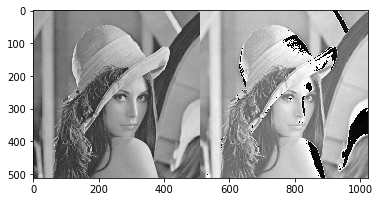

In [68]:
img = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)
print(img.shape)
print('\n')

print(type(img))
print(type(img[0,0]))

imgint = np.array(img,dtype='int')
print(type(imgint[0,0]))
img2 = img + 50


plt.imshow(np.hstack([img,img2]), cmap='gray')

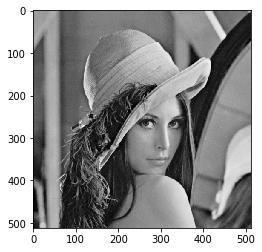

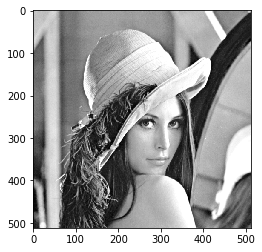

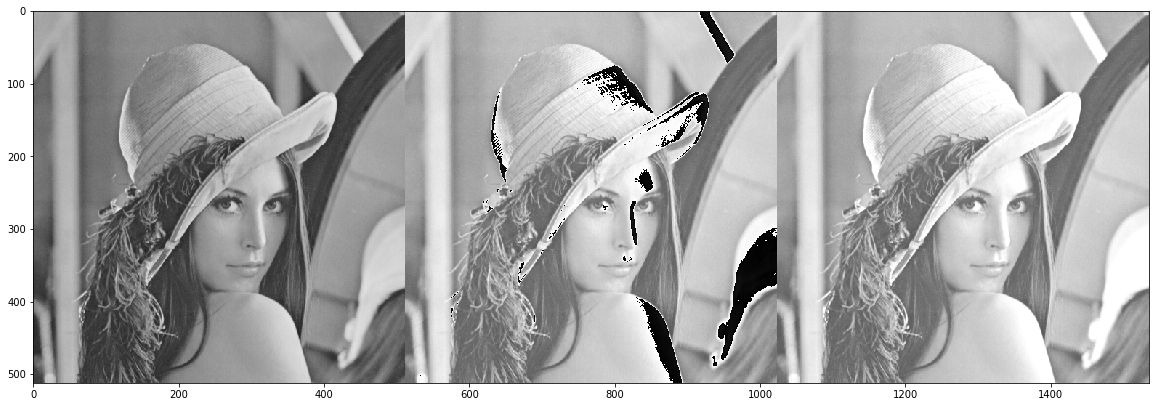

In [69]:
# 위와 다르게 이미지가 깨지지 않음-> 클래핑 기법으로 바꿨기 때문에

img3 = img.astype(int)  # img3 = np.array(img, dtype = 'int')로 해도 됌
img3 += 50   # img *=0.2도 고려해보길!
img3 = np.clip(img3, 0, 255).astype("uint8")

plt.imshow(img, cmap='gray')
plt.show()

plt.imshow(img3, cmap='gray')
plt.show()

fig=plt.figure(figsize=(20,10))
plt.imshow(np.hstack([img,img2,img3]), cmap='gray')
plt.show()

---

In [70]:
lut1 = [x for x in range(10)]
print(lut1)

lut2 = [x+5 for x in range(10)]
print(lut2)

lut3 = np.clip(lut2, 0, 9)
print(lut3)

def max(x):
    if x>=0 and x<=9:
        return x
    elif x>9:
        return 9
    else:
        return 0
    
lut4 = [max(x) for x in lut2]
print(lut4)

lut5 = [x+5 if x+5<=9 else 9 for x in range(10)]
print(lut5)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[5 6 7 8 9 9 9 9 9 9]
[5, 6, 7, 8, 9, 9, 9, 9, 9, 9]
[5, 6, 7, 8, 9, 9, 9, 9, 9, 9]


In [71]:
def addlut(op):
    return [ x+op if x+op <=255 else 255 for x in range(256)]

def mullut(op):
    return [x*op if x*op <=255 else 255 for x in range(256)]

In [72]:
print(addlut(5))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224,

In [73]:
print(mullut(1.5))

[0.0, 1.5, 3.0, 4.5, 6.0, 7.5, 9.0, 10.5, 12.0, 13.5, 15.0, 16.5, 18.0, 19.5, 21.0, 22.5, 24.0, 25.5, 27.0, 28.5, 30.0, 31.5, 33.0, 34.5, 36.0, 37.5, 39.0, 40.5, 42.0, 43.5, 45.0, 46.5, 48.0, 49.5, 51.0, 52.5, 54.0, 55.5, 57.0, 58.5, 60.0, 61.5, 63.0, 64.5, 66.0, 67.5, 69.0, 70.5, 72.0, 73.5, 75.0, 76.5, 78.0, 79.5, 81.0, 82.5, 84.0, 85.5, 87.0, 88.5, 90.0, 91.5, 93.0, 94.5, 96.0, 97.5, 99.0, 100.5, 102.0, 103.5, 105.0, 106.5, 108.0, 109.5, 111.0, 112.5, 114.0, 115.5, 117.0, 118.5, 120.0, 121.5, 123.0, 124.5, 126.0, 127.5, 129.0, 130.5, 132.0, 133.5, 135.0, 136.5, 138.0, 139.5, 141.0, 142.5, 144.0, 145.5, 147.0, 148.5, 150.0, 151.5, 153.0, 154.5, 156.0, 157.5, 159.0, 160.5, 162.0, 163.5, 165.0, 166.5, 168.0, 169.5, 171.0, 172.5, 174.0, 175.5, 177.0, 178.5, 180.0, 181.5, 183.0, 184.5, 186.0, 187.5, 189.0, 190.5, 192.0, 193.5, 195.0, 196.5, 198.0, 199.5, 201.0, 202.5, 204.0, 205.5, 207.0, 208.5, 210.0, 211.5, 213.0, 214.5, 216.0, 217.5, 219.0, 220.5, 222.0, 223.5, 225.0, 226.5, 228.0, 22

[* 참고 : LUT에 대한 내용(클릭)]('https://mrsnake.tistory.com/142')

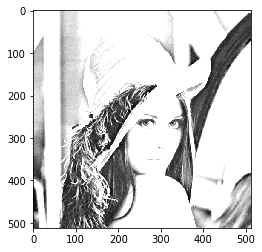

[[202 202 201 ... 210 194 165]
 [202 202 201 ... 210 194 165]
 [202 202 201 ... 210 194 165]
 ...
 [ 63  63  70 ... 138 134 136]
 [ 63  63  76 ... 140 141 146]
 [ 63  63  76 ... 140 141 146]]


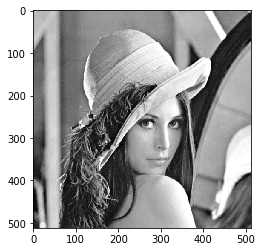

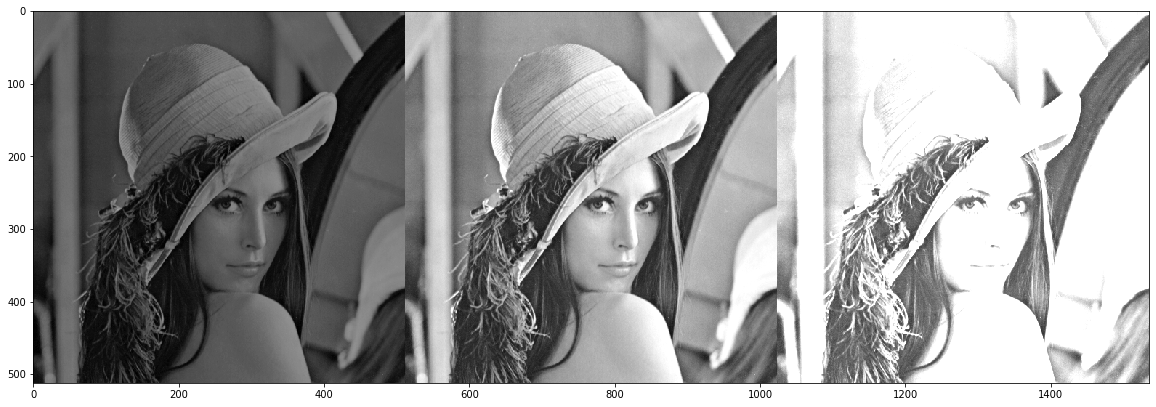

In [74]:
def mullut(op):
    return np.array([x*op if x*op <=255 else 255 for x in range(256)]).astype("uint8")

src2 = cv2.LUT(img,mullut(2.0))   # mullut(1.2)가 일반 리스트 타입이면 계산이 안됨... 그래서 위의 정의에서 array로 바꿔줬음
# print(src2)
plt.imshow(src2, cmap='gray')
plt.show()

src2 = cv2.LUT(img,mullut(1.2))
print(src2)
plt.imshow(src2, cmap='gray')
plt.show()

all = np.hstack([cv2.LUT(img, mullut(0.7)), 
                cv2.LUT(img, mullut(1.2)),
                cv2.LUT(img, mullut(2.0))])
fig = plt.figure(figsize=(20,10))
plt.imshow(all, cmap='gray')

In [75]:
def binarylut(t):
    return np.array([0 if x<t else 255 for x in range(256)]).astype("uint8")

def binarylut2(t) :   # 이건 True :1, Flase :0 의 형변환을 이용해서 만든 것
    return np.array([(x>t)*255 for x in range(256)]).astype("uint8")

def range_emphasis(w0,w1):
    return np.array([x if x<w0 or x>w1 else 255 for x in range(256)]).astype("uint8")

def posterlut(t) :
    return np.array([int(x/t)*t for x in range(256)]).astype("uint8")

def inverselut() :
    return np.array([255-x for x in range(256)]).astype("uint8")

def gammalut(gamma) :
    invGamma = 1.0/gamma
    return np.array([((i/255.0)** invGamma)*255 for i in np.arange(0, 256)])

In [76]:
print(binarylut(127))

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


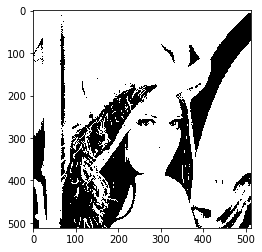

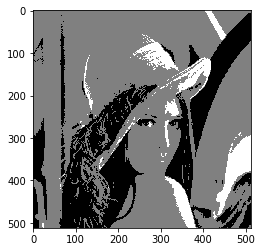

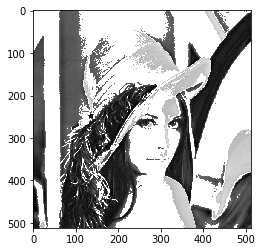

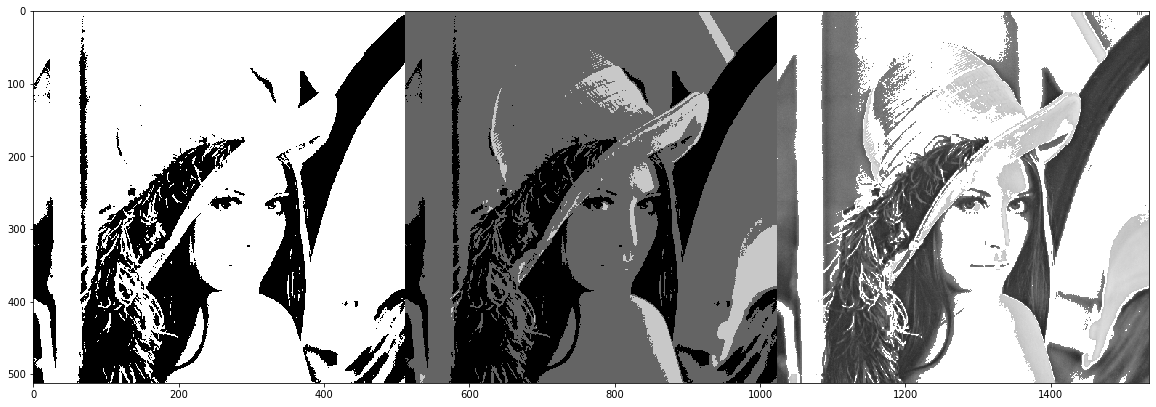

In [77]:
binary = cv2.LUT(img,binarylut(100))
print(binary)
plt.imshow(binary, cmap='gray')
plt.show()

posterizing = cv2.LUT(img,posterlut(100))
# print(posterizing)
plt.imshow(posterizing, cmap='gray')
plt.show()

range_emphasis_transform = cv2.LUT(img,range_emphasis(128, 192))
# print(range_emphasis_transform)
plt.imshow(range_emphasis_transform, cmap='gray')
plt.show()

fig=plt.figure(figsize=(20,10))
plt.imshow(np.hstack([binary, 
                      posterizing, 
                      range_emphasis_transform]), 
           cmap='gray')
plt.show()

[[211.51153403 211.51153403 210.94172792 ... 214.89238682 207.48336691
  192.8992736 ]
 [211.51153403 211.51153403 210.94172792 ... 214.89238682 207.48336691
  192.8992736 ]
 [211.51153403 211.51153403 210.94172792 ... 214.89238682 207.48336691
  192.8992736 ]
 ...
 [124.85905371 124.85905371 131.09647455 ... 177.55753892 175.43692954
  176.85405861]
 [124.85905371 124.85905371 136.03453534 ... 178.95455736 179.648183
  182.3911064 ]
 [124.85905371 124.85905371 136.03453534 ... 178.95455736 179.648183
  182.3911064 ]]


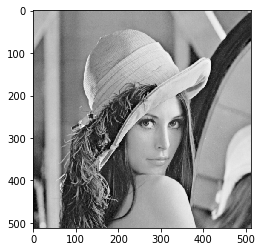

In [78]:
gamma = cv2.LUT(img, gammalut(2.2))
print(gamma)
plt.imshow(gamma, cmap="gray")

(512, 512)
(512, 512, 3)


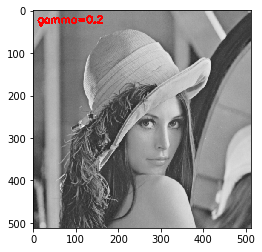

In [79]:
img = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)
print(img.shape)
col = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
print(col.shape)

#########사진 안에서 글씨 쓰는 것#########
cv2.putText(col, "gamma=0.2", (10,30),
           cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,0,0), 3)
# 0.8 은 글씨크기, (0,0,255)는 글씨 색깔, 3은 글씨 굵기
###################################################
plt.imshow(col)

In [90]:
img = cv2.imread("gamma.jpg")

for i in range(3):
    return col{k}.format(i) = cv2.LUT(img,gammalut(i+0.5)) 
    cv2.putText(col, f"gamma={i+0.5}", (10,30), 
               cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,0), 2)
    cv2.imwrite(f"g{k}.jpg".format(i), col{k}.format(i))
    
    

    


SyntaxError: invalid syntax (<ipython-input-90-0f1d7d202a3a>, line 4)

In [103]:
img = cv2.imread("gamma.jpg")
gm = [0.5, 1.2, 2.5, 3.0]
for i in range(len(gm)):
    col = cv2.LUT(img, gammalut(gm[i]))
    cv2.putText(col, f"gamma={gm[i]}", (10,30), 
               cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,0), 2)
    cv2.imwrite(f"g{i+1}.jpg", np.hstack([img,col]))

In [104]:
from PIL import Image
im1 = Image.open('g1.jpg')
im2 = Image.open('g2.jpg')
im3 = Image.open('g3.jpg')
im4 = Image.open('g4.jpg')

im1.save("out.gif", save_all=True, append_images=[im2, im3, im4],
        duration=500, loop=0)

<img src=out.gif?3443>

In [120]:
img = cv2.imread("Austria.jpg")
gm = [0.5, 1.2, 2.5, 3.0]
for i in range(len(gm)):
    col = cv2.LUT(img, gammalut(gm[i]))
    cv2.putText(col, f"gamma={gm[i]}", (10,30), 
               cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,0), 2)
    cv2.imwrite(f"g{i+5}.jpg", np.hstack([img,col]))
    
from PIL import Image
im5 = Image.open('g5.jpg')
im6 = Image.open('g6.jpg')
im7 = Image.open('g7.jpg')
im8 = Image.open('g8.jpg')

im5.save("out2.gif", save_all=True, append_images=[im6, im7, im8],
        duration=1000, loop=0)

<img src=out2.gif?3443>

In [113]:
img = cv2.imread("gamma.jpg") # opencv로 받아 들였기 때문에 BGR로 받아들였다.
imgPIL = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # BGR로 받아들여서 이상하게 나오기 떄문에 이것을 RGB로 바꿔줌

font = ImageFont.truetype("HMKMMAG.TTF", 20)

draw = ImageDraw.Draw(imgPIL)
draw.text((10,10), " 안녕", font=font, fill=(255,0,0))
imgPIL.save("out3.jpg")

---

In [157]:
img = cv2.imread("gamma.jpg")

K = 11
kernel = np.ones((K,K), np.float32)/ (K*K)
print(kernel)

[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00

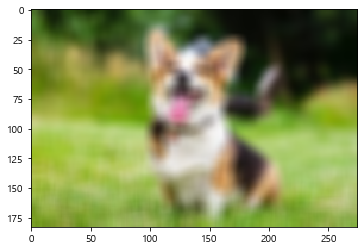

In [158]:
filtered = cv2.filter2D(img, -1, kernel)

plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))

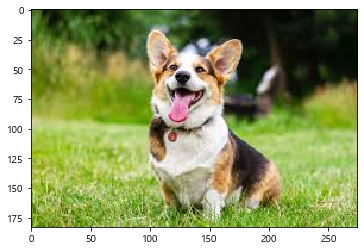

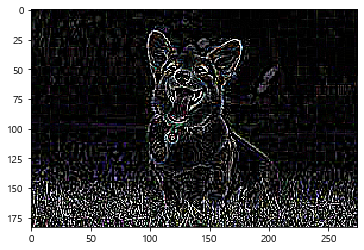

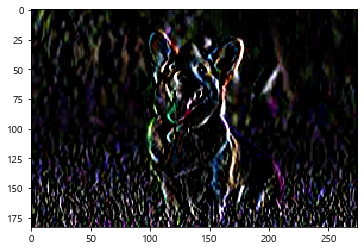

In [167]:
# 주로 영상에서 관심을 갖는 것은 고주파 임

kernel1 = np.array([[0, 0, 0,],
                   [0, 1, 0],
                   [0,0,0]
                   ])

kernel2 = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])


kernel3 = np.array([[1,0,-1],
                    [1,0,-1],
                    [1,0,-1]
                  ])

filtered1 = cv2.filter2D(img, -1, kernel1)
filtered2 = cv2.filter2D(img, -1, kernel2)
filtered3 = cv2.filter2D(img, -1, kernel3)

plt.imshow(cv2.cvtColor(filtered1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(filtered2, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(filtered3, cv2.COLOR_BGR2RGB))
plt.show()


In [105]:
col =[]
for i in range(4):
    col[i] = i+1

IndexError: list assignment index out of range